# Goals

* Give an overview of what ML is
* Different types of algorithms
* Machine Learning with scikit-learn
* Visualisation
* Producing a Model
* How to get started

---


# What Is Machine Learning?

*Learning* = Improving *performance* with *experience* at some *task*

- Improve over task _T_,
- With respect to performance measure, _P_
- Based on experience, E


## Spam Classification

- Classify emails as Spam or Not Spam - _Task_
- Showing it pre-classified (labelled) Spam and Not Spam - _Experience_
- Number of correctly identified - _Performance_

---


# Types of Machine Learning

## Supervised Learning
### Classification

Classification is about identifying which category or categories a new observation belongs to. The classifier is trained from a labelled set of training instances.

**Examples:**
- Spam or Not Spam
- Category of a Web Page (Business, News, Gaming, etc...)

**Requires:**
- A training set that is pre-labelled with the correct category

**Example Algorithms:**
- Logistic Regression
- SVM
- Decision Tree
- Naive Bayes


### Regression

Regression assigns a real-valued output to an input.

**Examples:**
- Predict house price for a given set of properties of a house.
- Number of messages per second Engine can process given a set of properties (hardware size, rules, etc...)



## Unsupervised Learning

Finds patterns in input data. For example clusters in data, or in text data, it can group documents into topics and discover the topics automatically.

**Example Algorithms**
- K-Means
- DBScan


---


# Python Tools

## Anaconda
https://anaconda.org/

## Scikit-learn
http://scikit-learn.org/stable/

## Pandas
https://pandas.pydata.org/

## Matplotlib
http://matplotlib.org/

## Numpy
http://www.numpy.org/


# Vector Space Model

Data must be converted into vectors. A corpus or set of data must therefore be a set of vectors. In a lot of instances this set of vectors is represented as a matrix.

There are several methods for converting text data (e.g. email) into a vector. Bag of Words is an example. In a bag of words model, the position of the text is irrelevant. It's only relevance is it exists and its frequency.

A document can be converted into a vector by assigning a specific position in the vector. In most cases the vector is also sparse and the whole training set is a sparse matrix.


# Transforming Textual Data
## Example (Convert to bag of words)

In [1]:
doc1 = "the quick brown fox jumps over the lazy dog"
doc2 = "a big black bear sat on a big black rug"
doc3 = "if a dog chews shoes whose shoes does he choose"

word2id = {}
wid = 0

def bag_of_words(doc):
    global word2id, wid
    words = {}
    for word in doc.split():
        words[word] = words.get(word, 0) + 1
        if word not in word2id:
            word2id[word] = wid
            wid += 1
    return words

bow1 = bag_of_words(doc1)
bow2 = bag_of_words(doc2)
bow3 = bag_of_words(doc3)

print(bow1)
print(bow2)
print(bow3)

{'the': 2, 'quick': 1, 'brown': 1, 'fox': 1, 'jumps': 1, 'over': 1, 'lazy': 1, 'dog': 1}
{'a': 2, 'big': 2, 'black': 2, 'bear': 1, 'sat': 1, 'on': 1, 'rug': 1}
{'if': 1, 'a': 1, 'dog': 1, 'chews': 1, 'shoes': 2, 'whose': 1, 'does': 1, 'he': 1, 'choose': 1}


## Convert Bag of Words to a Vector

In [2]:
# we need to have a unique position of each word in the vector
# so create a dictionary of word to id (vector column)
def to_sparse_vector(bow):
    return dict((word2id[w], freq) for (w, freq) in bow.items())

print("Sparse Vector")
print(to_sparse_vector(bow1))
print(to_sparse_vector(bow2))
print(to_sparse_vector(bow3))

def to_dense_vector(bow):
    vect = [0] * len(word2id)
    for w, freq in bow.items():
        vect[word2id[w]] = freq
    return vect
    
print("\nDense Vector")
print(to_dense_vector(bow1))
print(to_dense_vector(bow2))
print(to_dense_vector(bow3))

len(to_dense_vector(bow1))

Sparse Vector
{0: 2, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}
{8: 2, 9: 2, 10: 2, 11: 1, 12: 1, 13: 1, 14: 1}
{15: 1, 8: 1, 7: 1, 16: 1, 17: 2, 18: 1, 19: 1, 20: 1, 21: 1}

Dense Vector
[2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1]


22

# 2-Dimensional Document

Document distance

[]

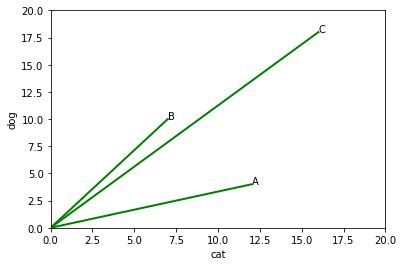

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
docs = [
    {'docname': 'A', 'cat': 12, 'dog': 4},
    {'docname': 'B', 'cat': 7, 'dog': 10},
    {'docname': 'C', 'cat': 16, 'dog': 18},
]

fig, ax = plt.subplots(1)
ax.set_xlim(0, 20)
ax.set_ylim(0, 20)
for i, doc in enumerate(docs):
    ax.annotate(doc['docname'], (doc['cat'], doc['dog']))
    ax.plot([0, doc['cat']], [0, doc['dog']], 'g', lw=2)
    
ax.set_xlabel('cat')
ax.set_ylabel('dog')
plt.plot()

---

# About Scikit-Learn

Scikit-Learn is a Python package designed to give access to well-known machine learning algorithms within Python code, through a clean, well thought-out API. It has been built by hundreds of contributors from around the world, and is used across industry and academia.

Scikit-Learn is built upon Python's NumPy (Numerical Python) and SciPy (Scientific Python) libraries, which enable efficient in-core numerical and scientific computation within Python.

Simple API, once you know how to use one algorithm, you can pretty much use any other algorithm in scikit-learn.


## Use scikit-learn to perform the frequency count

In [7]:
docs = ["the quick brown fox jumps over the lazy dog",
        "a big black bear sat on a big black rug",
        "if a dog chews shoes whose shoes does he choose",
        "the quick brown cat jumps over the lazy dog",
        "the slow red cat jumps over the lazy pig"]

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
dataset = vectorizer.fit_transform(docs)
print("Shape: ", dataset.shape)
print(dataset.toarray())
print(vectorizer.get_feature_names())
print(dataset[0])

Shape:  (5, 25)
[[0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 2 0]
 [1 2 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 2 0 0 1]
 [0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 2 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 2 0]]
['bear', 'big', 'black', 'brown', 'cat', 'chews', 'choose', 'does', 'dog', 'fox', 'he', 'if', 'jumps', 'lazy', 'on', 'over', 'pig', 'quick', 'red', 'rug', 'sat', 'shoes', 'slow', 'the', 'whose']
  (0, 8)	1
  (0, 13)	1
  (0, 15)	1
  (0, 12)	1
  (0, 9)	1
  (0, 3)	1
  (0, 17)	1
  (0, 23)	2


## Term Frequency Inverse Document Frequency (TF-IDF)

Term Frequency could just be simply the raw frequency:
$
\begin{align}
tf(t,d ) = f_{t,d}
\end{align}
$

A common form is to do log normalisation, so too large term frequencies don't have such huge effect.
$
\begin{align}
tf(t,d ) = log(1 + f_{t,d})
\end{align}
$

The inverse document frequency, just counts the number of documents in the corpus that has the term and uses the inverse of that.

$
\begin{align}
idf(t, D) = log \frac{N}{|1 + \{d \in D: t \in d \}|}
\end{align}
$

with
- $N$: total number of documents in the corpus $N = |D|$
- $|\{d \in D: t \in d \}|$: number of documents where t appears.


In [8]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=False)
dataset = transformer.fit_transform(dataset)
print(dataset.toarray())

[[ 0.          0.          0.          0.33658391  0.          0.          0.
   0.          0.26536662  0.45833067  0.          0.          0.26536662
   0.26536662  0.          0.26536662  0.          0.33658391  0.          0.
   0.          0.          0.          0.53073324  0.        ]
 [ 0.28867513  0.57735027  0.57735027  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.28867513  0.          0.          0.          0.          0.28867513
   0.28867513  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.31105706
   0.31105706  0.31105706  0.1800974   0.          0.31105706  0.31105706
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.62211411  0.          0.          0.31105706]
 [ 0.          0.          0.          0.35415727  0.35415727  0.          0.
   0.          0.27922166  0.      

In [9]:
import pandas as pd

for i, doc in enumerate(docs):
    print('%d: %s' % (i, doc))
    
df = pd.DataFrame(data=dataset.toarray(), columns=vectorizer.get_feature_names())
df

0: the quick brown fox jumps over the lazy dog
1: a big black bear sat on a big black rug
2: if a dog chews shoes whose shoes does he choose
3: the quick brown cat jumps over the lazy dog
4: the slow red cat jumps over the lazy pig


,bear,big,black,brown,cat,chews,choose,does,dog,fox,...,over,pig,quick,red,rug,sat,shoes,slow,the,whose
0,0.000000,0.00000,0.00000,0.336584,0.000000,0.000000,0.000000,0.000000,0.265367,0.458331,...,0.265367,0.000000,0.336584,0.000000,0.000000,0.000000,0.000000,0.000000,0.530733,0.000000
1,0.288675,0.57735,0.57735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.288675,0.288675,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.00000,0.00000,0.000000,0.000000,0.311057,0.311057,0.311057,0.180097,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.622114,0.000000,0.000000,0.311057
3,0.000000,0.00000,0.00000,0.354157,0.354157,0.000000,0.000000,0.000000,0.279222,0.000000,...,0.279222,0.000000,0.354157,0.000000,0.000000,0.000000,0.000000,0.000000,0.558443,0.000000
4,0.000000,0.00000,0.00000,0.000000,0.302698,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.238650,0.412188,0.000000,0.412188,0.000000,0.000000,0.000000,0.412188,0.477301,0.000000


# Which Documents Are Most Similar

There are many ways of doing distances in this vector space such as euclidean. For documents, tend to use cosine similarity, which measures angle of each document from another.

In [11]:
%precision 3
pd.options.display.float_format = '{:,.3f}'.format

from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(dataset, dataset)
print(sim)
df_sim = pd.DataFrame(data=sim)
df_sim

[[ 1.     0.     0.048  0.831  0.443]
 [ 0.     1.     0.     0.     0.   ]
 [ 0.048  0.     1.     0.05   0.   ]
 [ 0.831  0.     0.05   1.     0.574]
 [ 0.443  0.     0.     0.574  1.   ]]


,0,1,2,3,4
0,1.000,0.000,0.048,0.831,0.443
1,0.000,1.000,0.000,0.000,0.000
2,0.048,0.000,1.000,0.050,0.000
3,0.831,0.000,0.050,1.000,0.574
4,0.443,0.000,0.000,0.574,1.000


# Plot a heat map

[]

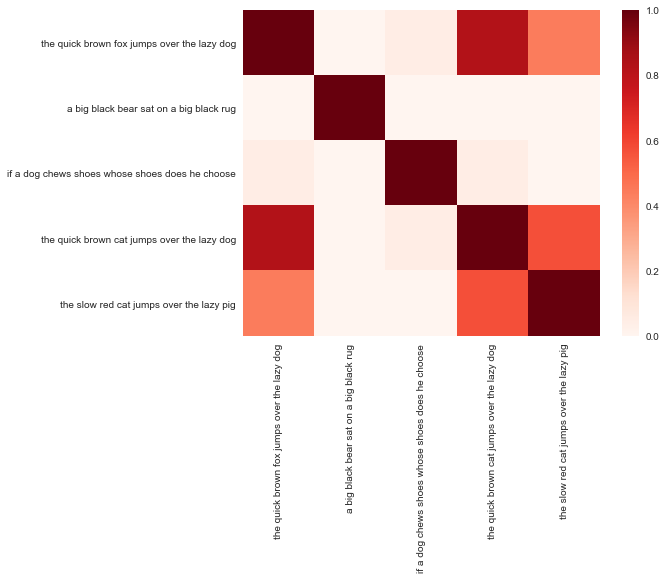

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import prettyplotlib as ppl
import numpy as np
import seaborn as sns

# for prettier plots
sns.set()
sns.set(rc={"figure.figsize": (8, 6)})


fig, ax = plt.subplots(1)
ppl.pcolormesh(fig, ax, sim)

ax.set_ylim(ax.get_ylim()[::-1])
tick_marks = np.arange(len(docs))
plt.xticks(tick_marks + .5, docs, rotation=90)
plt.yticks(tick_marks + .5, docs)
plt.plot()

---

# Representation of Data in Scikit-learn

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a *two-dimensional array or matrix*. The arrays can be either numpy arrays, or in some cases scipy.sparse matrices. The size of the array is exected to be [n_samples, n_features]

* **n_samples**: The number of samples: each sample is an item to process (e.g. classify). A sample can be a document, a picture, a sound, a video, an astronomical object, a row in database or CSV file, or whatever you can describe with a fixed set of quantitative traits.
* **n_features**: The number of features or distinct traits that can be used to describe each item in a quantitative manner. Features are generally real-valued, but may be boolean or discrete-valued in some cases.

Features must be converted into numerical values, e.g. text can be transformed using tf-idf, or frequency count.

The number of features must be fixed in advance. However it can be very high dimensional (e.g. millions of features) with most of them being zeros for a given sample. This is a case where scipy.sparse matrices can be useful, in that they are much more memory-efficient than numpy arrays.

In [13]:
%%html
<style>
table {display: inline-block}
</style>

# Toy datasets

scikit-learn comes with a few small standard datasets that do not require to download any file from some external website.

| Function                           | Description |
|:-----------------------------------|:------------|
| load_boston([return_X_y])          | Boston house-prices dataset (regression). |
| load_iris([return_X_y])            | Iris dataset (classification). |
| load_diabetes([return_X_y])        | Diabetes dataset (regression). |
| load_digits([n_class, return_X_y]) | Digits dataset (classification). |
| load_linnerud([return_X_y])        | Linnerud dataset (multivariate regression). |
| load_wine([return_X_y])            | Wine dataset (classification).
| load_breast_cancer([return_X_y])   | Breast cancer wisconsin dataset (classification). |


These datasets are useful to quickly illustrate the behavior of the various algorithms implemented in the scikit. They are however often too small to be representative of real world machine learning tasks.

# The Iris Dataset

One of the most popular datasets in Machine Learning first collected by Ronald Fisher in 1936. Where he collected 150 datapoints for 3 species of the Iris flower, which are:
- Versicolor
- Setosa
- Virginica

![species](Iris Species.jpg)

He collected 4 attributes of each species, which are:
- Petal Length
- Petal Width
- Sepal Length
- Sepal Width

![attributes](Iris Petal Sepal.jpeg)

In [15]:
from sklearn import datasets

# load the iris dataset
iris = datasets.load_iris()
print(iris.keys())
iris.data.shape

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


(150, 4)

## Sample Dataset Fields

|name          | description                                     |
|:-------------|:------------------------------------------------|
|data          | matrix of nrows observations and ncols features |
|target        | encoded label (integer)                         |
|target_names  | labels                                          |
|DESCR         | description of the dataset                      |
|feature_names | names of each column or feature                 |

Only the data and target are important to scikit-learn algorithms. The rest are metadata to help us make sense of the data.

In [17]:
print("target (label of each row): %s" % iris.target)
print("target_names: %s" % iris.target_names)
print("feature_names: %s" % iris.feature_names)
print(iris.DESCR[0:200])

target (label of each row): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
target_names: ['setosa' 'versicolor' 'virginica']
feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes


In [22]:
# Convert to pandas dataframe to show the dataset in a much friendlier manner
# We have to concatenate the data with the target (label) using np.c_
df = pd.DataFrame(data=np.c_[iris.data, iris.target], columns=iris.feature_names + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.100,3.500,1.400,0.200,0.000
1,4.900,3.000,1.400,0.200,0.000
2,4.700,3.200,1.300,0.200,0.000
3,4.600,3.100,1.500,0.200,0.000
4,5.000,3.600,1.400,0.200,0.000


In [21]:
n_samples, n_features = iris.data.shape
iris.data[0]

array([ 5.1,  3.5,  1.4,  0.2])

In [23]:
X = iris.data    # our training data
y = iris.target  # the label of the training data
print(X.shape)
print(y.shape)

(150, 4)
(150,)


# Exploratory Visualisation

Plot features against other features to see if there are any relationships

In [24]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199,1.000
std,0.828,0.434,1.764,0.763,0.819
min,4.300,2.000,1.000,0.100,0.000
25%,5.100,2.800,1.600,0.300,0.000
50%,5.800,3.000,4.350,1.300,1.000
75%,6.400,3.300,5.100,1.800,2.000
max,7.900,4.400,6.900,2.500,2.000


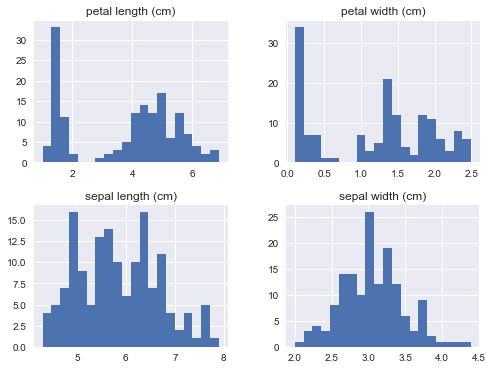

In [25]:
#df.hist(bins=20)
df.iloc[:, 0:4].hist(bins=20)
plt.show()

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def scatter_plot(dataset, feature_1, feature_2):
    # this formatter will label the colorbar with the correct target names
    formatter = plt.FuncFormatter(lambda i, *args: dataset.target_names[int(i)])

    plt.scatter(dataset.data[:, feature_1], dataset.data[:, feature_2],
                c=dataset.target, cmap=plt.cm.get_cmap('Accent', 3))
    plt.xlabel(dataset.feature_names[feature_1])
    plt.ylabel(dataset.feature_names[feature_2])
    plt.colorbar(ticks=[0, 1, 2], format=formatter)
    plt.clim(-0.5, 2.5)


## Sepal Width v Sepal Length

Plot sepal width (feature 0) against sepal length (feature 1)

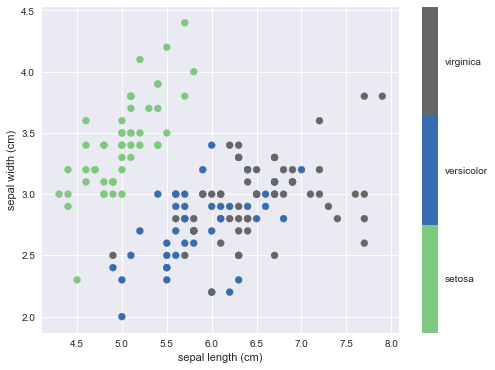

In [27]:
scatter_plot(iris, 0, 1)

## Petal Width vs Petal Length

Plot petal width (feature 2) against petal length (feature3)

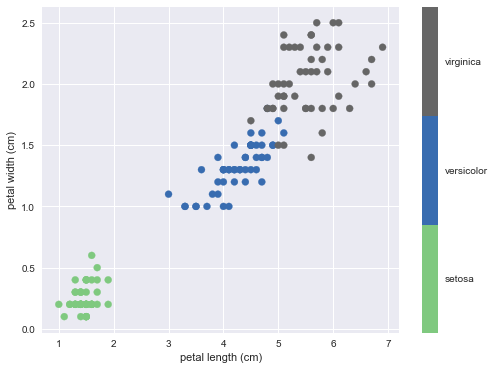

In [28]:
scatter_plot(iris, 2, 3)

# Creating a Model

In [29]:
from sklearn.linear_model import LogisticRegression

# y = mx + c
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [31]:
y
model.predict(X) == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [32]:
iris.data.shape

(150, 4)

## We Don't Have Too Many Samples

We only have 150 samples. Let's try another dataset to play around with.


# Digit Dataset

A collection of handwritten numbers.

In [33]:
digits = datasets.load_digits()

The digits dataset has an extra field called images. This is just the same as data, but formatted as 8x8

In [34]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [36]:
print(digits.data.shape)
print(digits.images.shape)

(1797, 64)
(1797, 8, 8)


## Show the first example

In [38]:
print(digits.data[0])
print(digits.images[0])

[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


## Plot the first example

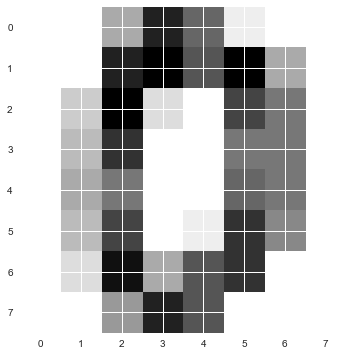

Target: 0


(1797, 64)

In [40]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
print("Target: %d" % digits.target[0])
digits.data.shape

# Create a Model to identify digits

Same as before, we'll use logistic regression and also try out support vector machine.

This time around, we will split the data into a training set and a test set to prevent overfitting.

In [41]:
from sklearn.model_selection import train_test_split

y = digits.target
X = digits.data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Fit a Model

In [42]:
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Test Model with Training Data

This should have good accuracy since it was trained to this data

In [44]:
from sklearn import metrics

predicted = logit_model.predict(X_train)
expected = y_train
print("Classification report for classifier: %s\n %s\n"
     % (model, metrics.classification_report(expected, predicted)))

Classification report for classifier: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       141
          1       1.00      1.00      1.00       139
          2       1.00      1.00      1.00       133
          3       0.99      1.00      1.00       138
          4       1.00      1.00      1.00       143
          5       1.00      1.00      1.00       134
          6       1.00      1.00      1.00       129
          7       1.00      1.00      1.00       131
          8       0.98      0.98      0.98       126
          9       0.99      0.98      0.98       133

avg / total       1.00      1.00      1.00      1347




# Test Model with Test Data

In [46]:
predicted = logit_model.predict(X_test)
expected = y_test
print("Classification report for classifier: %s\n %s\n"
     % (logit_model, metrics.classification_report(expected, predicted)))

Classification report for classifier: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.89      0.91      0.90        43
          2       0.95      0.93      0.94        44
          3       0.90      0.96      0.92        45
          4       0.97      1.00      0.99        38
          5       0.98      0.98      0.98        48
          6       0.96      1.00      0.98        52
          7       1.00      0.94      0.97        48
          8       0.93      0.90      0.91        48
          9       0.96      0.94      0.95        47

avg / total       0.95      0.95      0.95       450




# See if we can do better with SVM

In [47]:
from sklearn import svm

svm_model = svm.SVC(kernel='linear', C=.001)
svm_model.fit(X_train, y_train)

#logit_model = LogisticRegression()
#logit_model.fit(X_train, y_train)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Test Model with Training Data

In [48]:
predicted = svm_model.predict(X_train)
expected = y_train
print("Classification report for classifier: %s\n %s\n"
     % (svm_model, metrics.classification_report(expected, predicted)))

Classification report for classifier: SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       141
          1       0.98      1.00      0.99       139
          2       1.00      1.00      1.00       133
          3       0.99      1.00      1.00       138
          4       1.00      0.99      0.99       143
          5       0.99      0.99      0.99       134
          6       1.00      1.00      1.00       129
          7       0.99      0.99      0.99       131
          8       0.98      0.98      0.98       126
          9       0.98      0.98      0.98       133

avg / total       0.99      0.99      0.99      1347




# Test Model with Test Data

In [49]:
predicted = svm_model.predict(X_test)
expected = y_test
print("Classification report for classifier: %s\n %s\n"
     % (svm_model, metrics.classification_report(expected, predicted)))

Classification report for classifier: SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.91      1.00      0.96        43
          2       1.00      1.00      1.00        44
          3       1.00      0.96      0.98        45
          4       0.97      1.00      0.99        38
          5       0.98      0.98      0.98        48
          6       1.00      0.98      0.99        52
          7       1.00      0.98      0.99        48
          8       0.96      0.94      0.95        48
          9       0.96      0.96      0.96        47

avg / total       0.98      0.98      0.98       450




# Try a couple of random examples

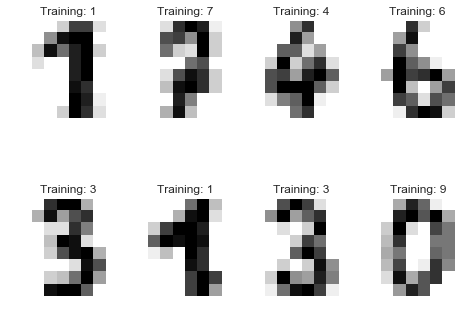

In [50]:
test_data, test_images, test_labels = digits.data[1500:1508], digits.images[1500:1508], digits.target[1500:1508]
images_and_labels = list(zip(test_images, test_labels))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [51]:
print("Prediction: %s" % svm_model.predict(test_data))
print("Real Value: %s" % test_labels)

Prediction: [1 7 4 6 3 1 3 9]
Real Value: [1 7 4 6 3 1 3 9]


In [52]:
print("Prediction: %s" % logit_model.predict(test_data))
print("Real Value: %s" % test_labels)

Prediction: [1 7 4 6 3 1 3 9]
Real Value: [1 7 4 6 3 1 3 9]


# What's in the Model?

In [53]:
print(logit_model.coef_.shape)

(10, 64)


For a logistic regression model, it has 10 rows for each number (0 to 9), with each column being the weight of each pixel (8x8 or 64 pixels altogether)

For example, the weights for *0* are:

In [55]:
logit_model.coef_[0]

array([  0.000e+00,  -3.823e-02,  -9.961e-02,   9.477e-02,  -1.373e-01,
        -3.088e-01,  -2.439e-01,  -2.937e-02,  -1.721e-05,  -1.151e-01,
        -5.443e-02,   1.644e-01,   1.888e-01,   2.505e-01,  -5.383e-02,
        -2.145e-02,  -4.394e-06,   7.029e-02,   1.364e-01,  -1.588e-01,
        -3.525e-01,   3.219e-01,  -1.504e-03,  -3.206e-03,  -1.238e-06,
         4.130e-02,  -4.283e-02,  -1.306e-01,  -5.567e-01,   1.442e-02,
         2.887e-02,  -2.682e-04,   0.000e+00,   1.570e-01,   5.771e-02,
        -1.815e-01,  -5.772e-01,  -1.338e-02,  -4.256e-02,   0.000e+00,
        -2.088e-03,  -1.011e-01,   2.869e-01,  -2.690e-01,  -2.852e-01,
         4.083e-02,   4.877e-02,  -1.448e-04,  -2.192e-03,  -1.199e-01,
         2.953e-02,   1.589e-02,   1.648e-01,   1.940e-02,  -7.202e-02,
        -1.129e-02,  -6.793e-06,  -4.305e-02,  -2.421e-01,   1.156e-01,
        -3.468e-01,  -1.852e-01,  -9.231e-02,  -3.185e-02])

# Evaluating the Model Manually

A logistic regression is just its dot product passed through a logistic function.

dot product is:

$
\begin{align}
a * b = \sum_{k=1}^n a_k b_k = a_1 b_1 + a_2 b_2 + ... + a_n + b_n
\end{align}
$

The logistic function is:

$
\begin{align}
f(x) = \frac{1}{1 + {e^{-x}}}
\end{align}
$

Let's pick one example and evaluate it against our model:

Label: 4
Pixel data: [  0.   0.   0.   7.  13.   0.   0.   0.   0.   0.   0.  14.   6.   0.   0.
   0.   0.   0.  10.  10.   2.   6.   0.   0.   0.   3.  16.   3.   9.  13.
   2.   0.   0.  11.  12.   6.  14.  16.  10.   0.   0.  11.  16.  16.  16.
  10.   3.   0.   0.   2.   8.  10.  16.   1.   0.   0.   0.   0.   0.   9.
  13.   0.   0.   0.]


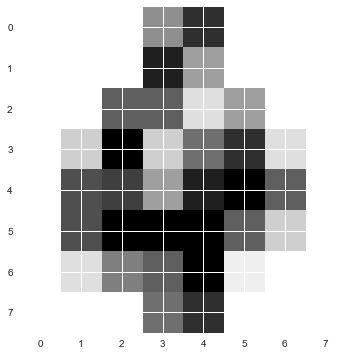

In [57]:
print("Label: %d" % test_labels[2])
print("Pixel data: %s" % test_data[2])
plt.imshow(test_data[2].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

## Calculate the dot product and pass through logistic

The one with the highest score wins

In [59]:
import math

def dot_product(a, b):
    return sum([a1 * b1 for (a1, b1) in zip(a, b)])

def logistic(x):
    return 1 / (1 + math.exp(-x))

for n, weights in enumerate(logit_model.coef_):
    x = dot_product(test_data[2], weights)
    score = logistic(x)
    print("n=%d, score=%.3f" % (n, score))

n=0, score=0.000
n=1, score=0.000
n=2, score=0.000
n=3, score=0.000
n=4, score=1.000
n=5, score=0.000
n=6, score=0.000
n=7, score=0.000
n=8, score=0.000
n=9, score=0.000


## This can also be simply done by numpy as:

In [60]:
weights = logit_model.coef_
score = 1 / (1 + np.exp(-weights.dot(test_data[2])))
for n, p in enumerate(score):
    print("n=%d, score=%.3f" % (n, p))

n=0, score=0.000
n=1, score=0.000
n=2, score=0.000
n=3, score=0.000
n=4, score=1.000
n=5, score=0.000
n=6, score=0.000
n=7, score=0.000
n=8, score=0.000
n=9, score=0.000


# Learning Curves

Plotting the learning curves for the training set and test set allows us to do some bias/variance analysis.

The learnings curves allow us to do some analysis on the training based on how well it performs with different number of training data.

In [61]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    #plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## Cross-validation

We also perform k-fold cross validation here, using sklearn's ShuffleSplit. We split it 100 times and reserving 20% for test data on each split, while training on the remainder.

In [62]:
from sklearn.model_selection import ShuffleSplit

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

# Logistic Regression Learning Curves

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

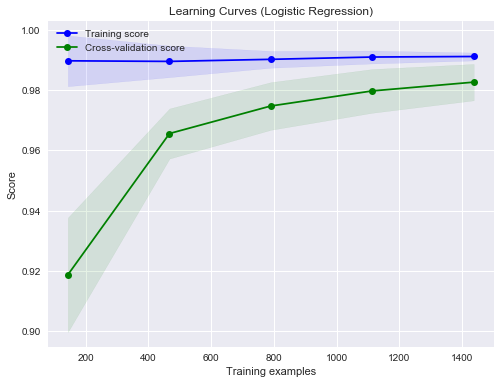

In [63]:
plot_learning_curve(svm_model, "Learning Curves (Logistic Regression)", X, y, cv=cv, n_jobs=4)

# SVM Learning Curves

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

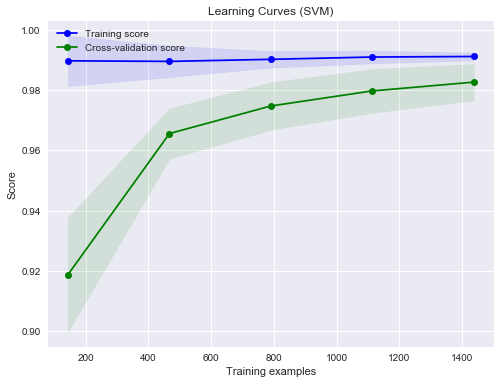

In [64]:
plot_learning_curve(svm_model, "Learning Curves (SVM)", X, y, cv=cv, n_jobs=4)

# High Bias or Underfitting

The training error and validation error high.
Getting more training data alone will not help.

Overfit or high variance on the other hand, has very low training error, but high cross validation error.

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

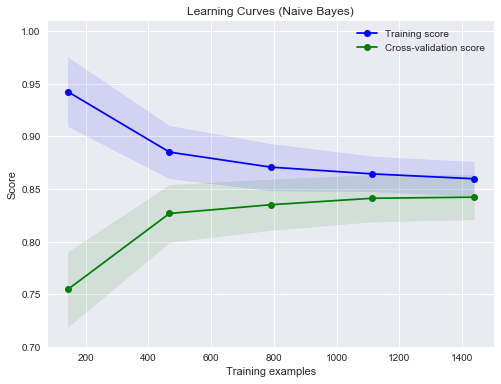

In [65]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
plot_learning_curve(nb_model, "Learning Curves (Naive Bayes)", X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

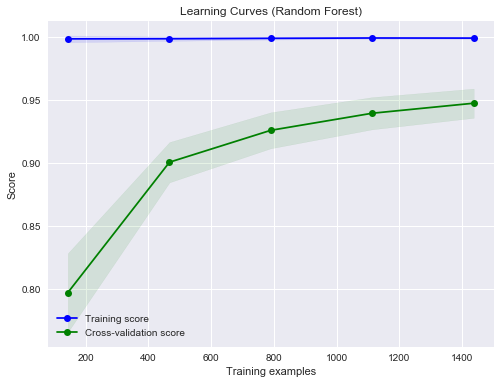

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
plot_learning_curve(rf_model, "Learning Curves (Random Forest)", X, y, cv=cv, n_jobs=4)

# Confusion Matrix

In [67]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.grid()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.plot()

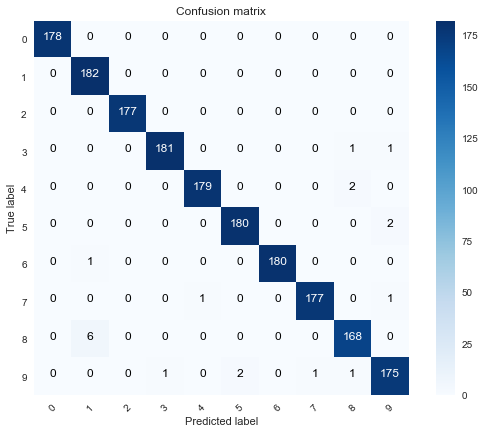

In [68]:
from sklearn.metrics import confusion_matrix

y_pred = svm_model.predict(X)
#y_labels = [l.argmax() for l in y]
y_labels = y
plot_confusion_matrix(confusion_matrix(y_labels, y_pred), digits.target_names)

# Linear Regression

Another type of machine learning problem is predicting a real value from an attribute. A good example is housing price given certain attributes of a house.

## Boston Dataset
Scikit-learn comes with a dataset of the Boston Housing price, albeit a little bit dated.

Let's load the dataset.

In [69]:
boston = datasets.load_boston()

In [70]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### What does the dataset look like?

In [71]:
df = pd.DataFrame(data=np.c_[boston['data'], boston['target']], columns=boston.feature_names.tolist() + ['target'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330,36.200


### Are there any patterns in the data?

As above the attributes are in this order:

| Column | Feature | Description                                                           |
|:-------|:--------|:----------------------------------------------------------------------|
| 0      | CRIM    | per capita crime rate by town                                         |
| 1      | ZN      | proportion of residential land zoned for lots over 25,000 sq.ft.      |
| 2      | INDUS   | proportion of non-retail business acres per town                      |
| 3      | CHAS    | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
| 4      | NOX     | nitric oxides concentration (parts per 10 million)                    |
| 5      | RM      | average number of rooms per dwelling                                  |
| 6      | AGE     | proportion of owner-occupied units built prior to 1940                |
| 7      | DIS     | weighted distances to five Boston employment centres                  |
| 8      | RAD     | index of accessibility to radial highways                             |
| 9      | TAX     | full-value property-tax rate per \$10,000                             |
| 10     | PTRATIO | pupil-teacher ratio by town                                           |
| 11     | B       | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town        |
| 12     | LSTAT   | % lower status of the population                                      |
| 13     | MEDV    | Median value of owner-occupied homes in $1000's                       |

First a quick histogram of each feature

[]

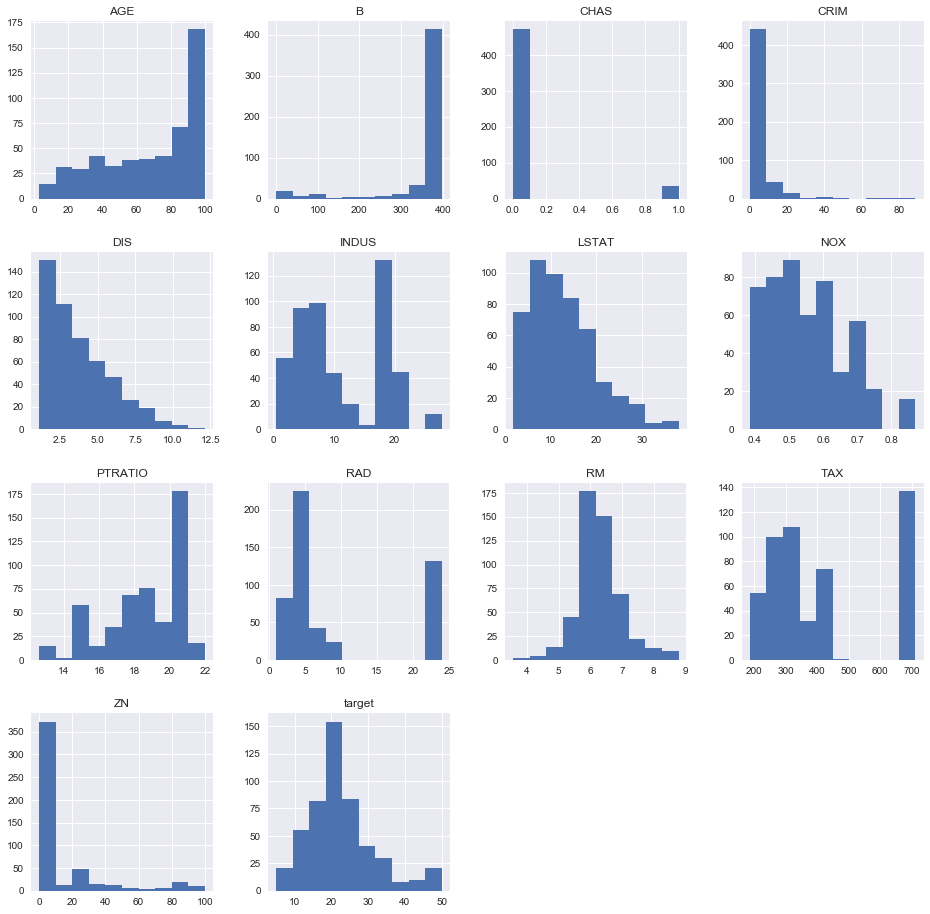

In [72]:
df.hist(figsize=(16, 16))
plt.plot()

Let's do a quick scatter plot of a few variables against the target (house price)

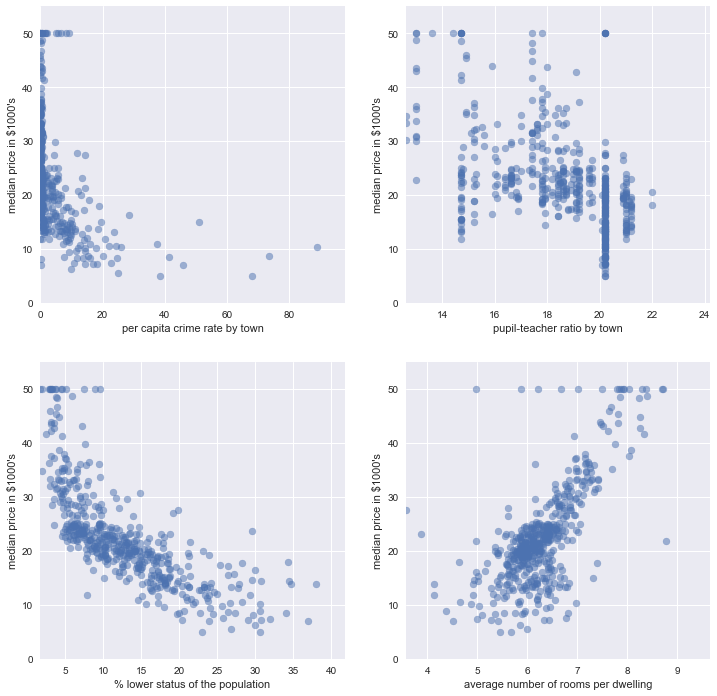

In [73]:
X, y = boston.data, boston.target

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

def scatter_plot(ax, x, y, xlabel, ylabel):
    ax.scatter(x, y, alpha=.5)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_ylim(min(0, y.min() * .9), y.max() * 1.1)
    ax.set_xlim(x.min(), x.max() * 1.1)

ylab = "median price in $1000's"
scatter_plot(axes[0, 0], X[:,0], y, "per capita crime rate by town", ylab)
scatter_plot(axes[0, 1], X[:,10], y, "pupil-teacher ratio by town", ylab)
scatter_plot(axes[1, 0], X[:,12], y, "% lower status of the population", ylab)
scatter_plot(axes[1, 1], X[:,5], y, "average number of rooms per dwelling", ylab)

plt.show()


# Pair Plot

Python Data Tools provide us with a lot of ways of exploring the data. A quick pair plot also shows us if there are any other relationships in the data.

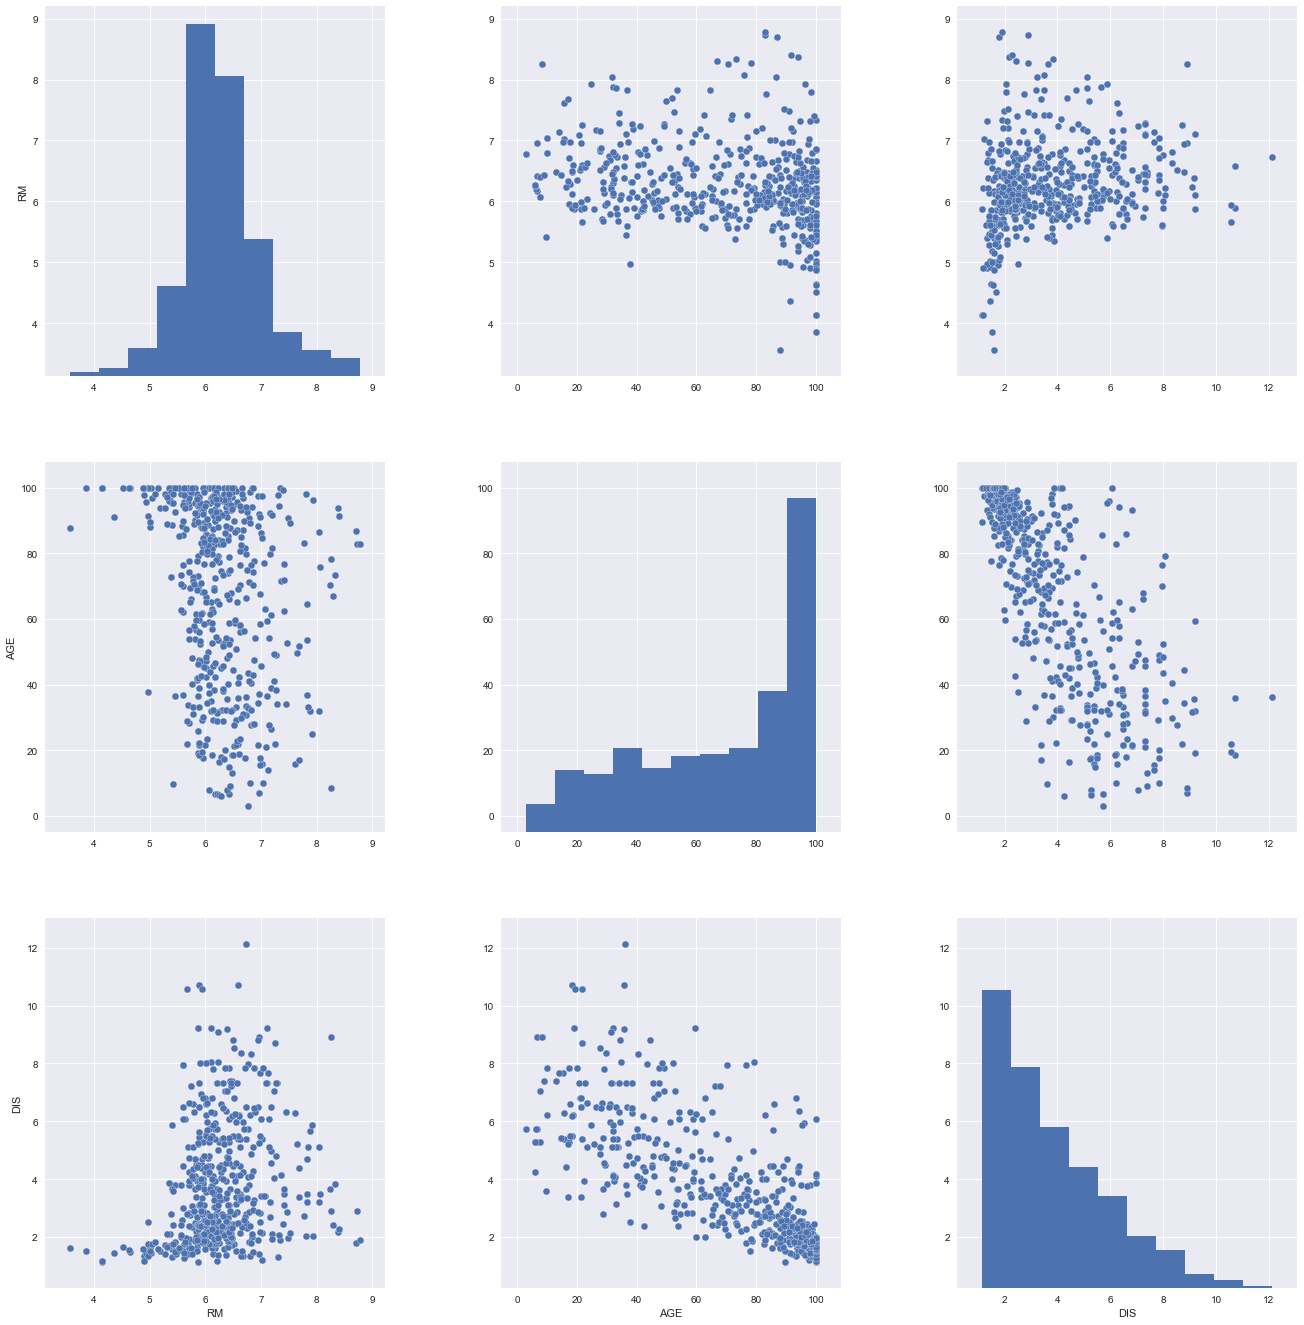

In [74]:
g = sns.pairplot(df.iloc[:,5:8])
g.fig.set_figwidth(20)
g.fig.set_figheight(20)

## Let's build a model

In [75]:
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lin_model = linear_model.LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Let's test our model

In [76]:
predicted = lin_model.predict(X_train)
expected = y_train
print("Expected | Predicted | Error | Squared Error")
for i in range(10):
    error = predicted[i]-expected[i]
    print("%8.2f | %9.2f | %5.2f | %13.2f" % (expected[i], predicted[i], error, error**2))

Expected | Predicted | Error | Squared Error
   18.50 |     13.54 | -4.96 |         24.58
   19.60 |     21.04 |  1.44 |          2.07
   33.20 |     35.26 |  2.06 |          4.23
   13.10 |     19.31 |  6.21 |         38.52
    7.50 |     12.86 |  5.36 |         28.77
   13.60 |     13.84 |  0.24 |          0.06
   17.40 |     22.67 |  5.27 |         27.75
    8.40 |     14.19 |  5.79 |         33.52
   35.40 |     31.23 | -4.17 |         17.35
   24.00 |     25.27 |  1.27 |          1.63


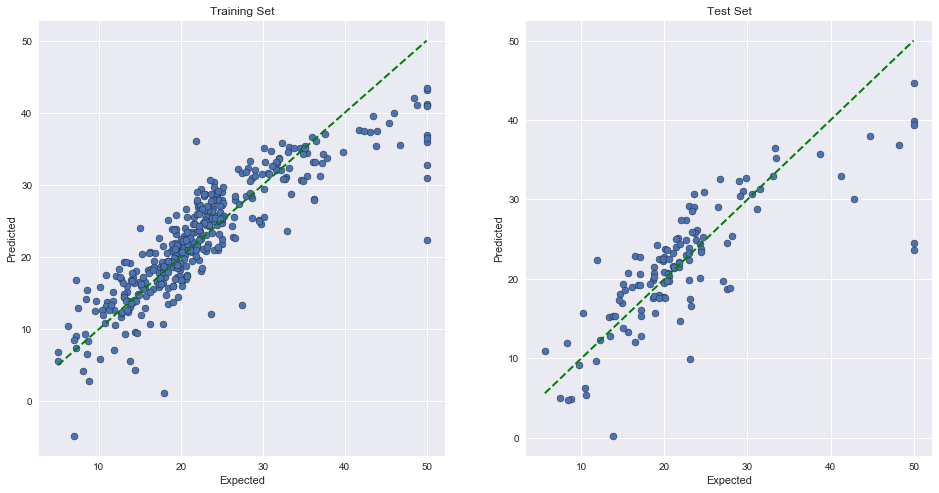

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.scatter(expected, predicted, edgecolors=(0, 0, 0))
ax1.plot([expected.min(), expected.max()], [expected.min(), expected.max()], 'g--', lw=2)
ax1.set_xlabel('Expected')
ax1.set_ylabel('Predicted')
ax1.set_title('Training Set')

predicted = lin_model.predict(X_test)
expected = y_test

ax2.scatter(expected, predicted, edgecolors=(0, 0, 0))
ax2.plot([expected.min(), expected.max()], [expected.min(), expected.max()], 'g--', lw=2)
ax2.set_xlabel('Expected')
ax2.set_ylabel('Predicted')
ax2.set_title('Test Set')
plt.show()

# How to Choose an Algorithm

![ml_map](ml_map.png)

# Ideas

## IP Address Reputation
We can assign reputation or risk factor of an ip address. Some features that may be useful are:
static-ip, ptr-record, is-an-mx, spam-activity, good-activity, sent-mail-to, dial-up-or-dsl

## Topic Modelling

## Anomaly Detection


# Conclusion

This is a very short introduction to Machine Learning, but provides quick and practical information.
Models can be built in Python and evaluated in another language such as C++. This is useful for things such as Spam Classification.

Most of the training involves:
- collecting data
- cleaning the data
- feature engineering
- model selection and tuning of hyper parameters
- analysis of overfitting and underfitting (aka variance and bias)

Neural Networks and Deep Neural Networks operate in a very similar way to logistic regression with multiple layers.
There are very many more algorithms that work well in other cases

# Resources

### Machine Learning Libraries
- Accord.NET Framework - http://accord-framework.net/
- Keras
- TensorFlow

### Datasets
- https://www.openml.org/search?type=data
- Kaggle - https://www.kaggle.com/datasets
- Microsoft Malware Dataset - https://www.kaggle.com/c/malware-classification/data

### Visualisation
- Plotly - https://plot.ly/
- Seaborn - https://seaborn.pydata.org/
- Tableau - https://www.tableau.com/
- Bokeh - https://bokeh.pydata.org/en/latest/


# Deep Learning with Keras

In [78]:
from keras.models import Sequential
model = Sequential()
from keras.layers import Dense

model.add(Dense(units=100, activation='relu', input_dim=64))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

X = digits.data
y = np.zeros(shape=(digits.target.shape[0], 10))
for m, n in enumerate(digits.target):
    y[m, n] = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model.fit(X_train, y_train, epochs=5, batch_size=32)

Using TensorFlow backend.


Epoch 1/5
1347/1347 [==============================] - 0s 206us/step - loss: 1.7146 - acc: 0.6273
Epoch 2/5
1347/1347 [==============================] - 0s 106us/step - loss: 0.3168 - acc: 0.9065
Epoch 3/5
1347/1347 [==============================] - 0s 92us/step - loss: 0.1939 - acc: 0.9451
Epoch 4/5
1347/1347 [==============================] - 0s 71us/step - loss: 0.1535 - acc: 0.9517
Epoch 5/5
1347/1347 [==============================] - 0s 51us/step - loss: 0.1200 - acc: 0.9644


In [79]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)
print(loss_and_metrics)

450/450 [==============================] - 0s 37us/step
[0.30367472688357033, 0.88666667037540015]


In [80]:
model.fit(X_train, y_train, epochs=20, batch_size=32)
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)
print(loss_and_metrics)

Epoch 1/20
1347/1347 [==============================] - 0s 29us/step - loss: 0.0972 - acc: 0.9770
Epoch 2/20
1347/1347 [==============================] - 0s 34us/step - loss: 0.0822 - acc: 0.9807
Epoch 3/20
1347/1347 [==============================] - 0s 31us/step - loss: 0.0715 - acc: 0.9852
Epoch 4/20
1347/1347 [==============================] - 0s 30us/step - loss: 0.0643 - acc: 0.9889
Epoch 5/20
1347/1347 [==============================] - 0s 30us/step - loss: 0.0816 - acc: 0.9829
Epoch 6/20
1347/1347 [==============================] - 0s 29us/step - loss: 0.0497 - acc: 0.9933
Epoch 7/20
1347/1347 [==============================] - 0s 28us/step - loss: 0.0491 - acc: 0.9918
Epoch 8/20
1347/1347 [==============================] - 0s 28us/step - loss: 0.0638 - acc: 0.9911
Epoch 9/20
1347/1347 [==============================] - 0s 28us/step - loss: 0.0373 - acc: 0.9963
Epoch 10/20
1347/1347 [==============================] - 0s 29us/step - loss: 0.0353 - acc: 0.9970
Epoch 11/20
1347/13

In [81]:
model.fit(X_train, y_train, epochs=100, batch_size=32)
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)
print(loss_and_metrics)

Epoch 1/100
1347/1347 [==============================] - 0s 32us/step - loss: 0.0191 - acc: 0.9993
Epoch 2/100
1347/1347 [==============================] - 0s 28us/step - loss: 0.0181 - acc: 0.9993
Epoch 3/100
1347/1347 [==============================] - 0s 30us/step - loss: 0.0178 - acc: 1.0000
Epoch 4/100
1347/1347 [==============================] - 0s 29us/step - loss: 0.0168 - acc: 0.9993
Epoch 5/100
1347/1347 [==============================] - 0s 29us/step - loss: 0.0166 - acc: 0.9993
Epoch 6/100
1347/1347 [==============================] - 0s 31us/step - loss: 0.0163 - acc: 0.9993
Epoch 7/100
1347/1347 [==============================] - 0s 30us/step - loss: 0.0150 - acc: 0.9993
Epoch 8/100
1347/1347 [==============================] - 0s 30us/step - loss: 0.0147 - acc: 1.0000
Epoch 9/100
1347/1347 [==============================] - 0s 29us/step - loss: 0.0146 - acc: 1.0000
Epoch 10/100
1347/1347 [==============================] - 0s 30us/step - loss: 0.0133 - acc: 1.0000
Epoch 11/

1347/1347 [==============================] - 0s 32us/step - loss: 0.0039 - acc: 1.0000
Epoch 84/100
1347/1347 [==============================] - 0s 30us/step - loss: 0.0038 - acc: 1.0000
Epoch 85/100
1347/1347 [==============================] - 0s 30us/step - loss: 0.0038 - acc: 1.0000
Epoch 86/100
1347/1347 [==============================] - 0s 30us/step - loss: 0.0037 - acc: 1.0000
Epoch 87/100
1347/1347 [==============================] - 0s 32us/step - loss: 0.0036 - acc: 1.0000
Epoch 88/100
1347/1347 [==============================] - 0s 31us/step - loss: 0.0037 - acc: 1.0000
Epoch 89/100
1347/1347 [==============================] - 0s 32us/step - loss: 0.0036 - acc: 1.0000
Epoch 90/100
1347/1347 [==============================] - 0s 31us/step - loss: 0.0036 - acc: 1.0000
Epoch 91/100
1347/1347 [==============================] - 0s 32us/step - loss: 0.0035 - acc: 1.0000
Epoch 92/100
1347/1347 [==============================] - 0s 32us/step - loss: 0.0036 - acc: 1.0000
Epoch 93/100


In [ ]:
model.fit(X_train, y_train, epochs=1000, batch_size=32)
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)
print(loss_and_metrics)

In [ ]:
email = feature vector = [ rules that have triggerd ]
email = feature vector = [words ]